# **Import Libraries**

In [136]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import shapiro, kstest, normaltest, skew, zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor

#import plotly.express as px

import statsmodels.api as sm

import pickle

import json

import warnings 
warnings.filterwarnings("ignore")

# **Problem Statement**

### To predict customer score by using given features

# **Data Gathering**

In [137]:
cust_df = pd.read_csv(r'D:\Python and DataScience\DataScienceProgram\Data_sets\Customers.csv')
cust_df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Exploratory Data Analysis**

In [138]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Genre           200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [139]:
cust_df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [140]:
cust_df.isna().sum()

CustomerID        0
Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

# **Feature Engineering**

In [141]:
cust_df['Age'].value_counts()

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

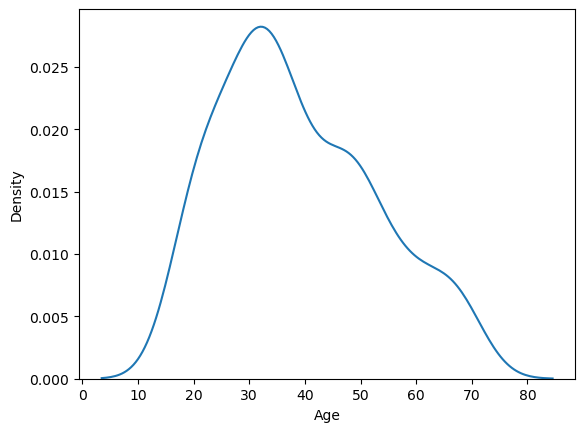

In [142]:
sns.kdeplot(cust_df['Age'])

<Axes: xlabel='Age'>

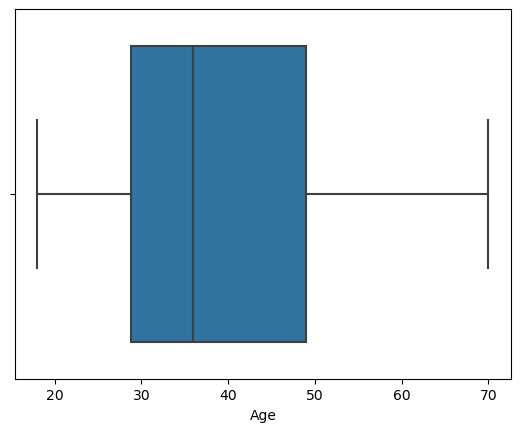

In [143]:
sns.boxplot(x= cust_df['Age'])

In [144]:
cust_df['Annual_Income'].value_counts()

Annual_Income
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

<Axes: xlabel='Annual_Income', ylabel='Density'>

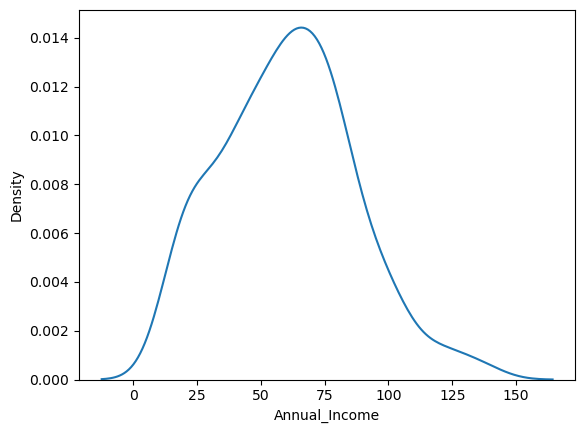

In [145]:
sns.kdeplot(cust_df['Annual_Income'])

<Axes: xlabel='Annual_Income'>

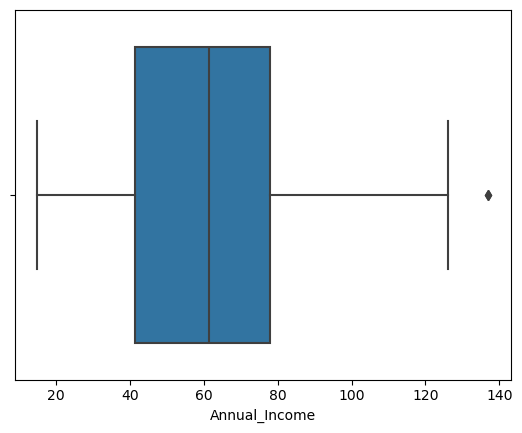

In [146]:
sns.boxplot(x= cust_df['Annual_Income'])

In [147]:
cust_df['CustomerID'].value_counts()

CustomerID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64

<Axes: xlabel='CustomerID', ylabel='Density'>

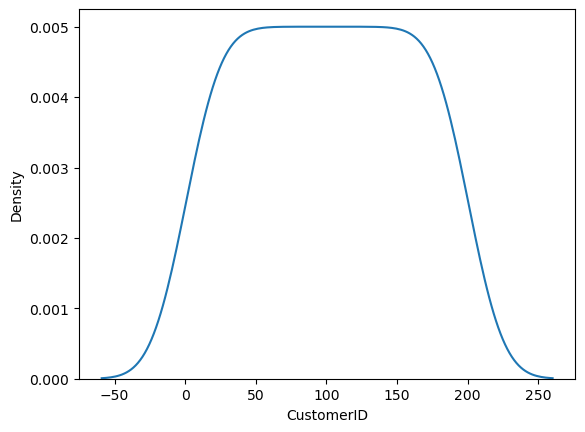

In [148]:
sns.kdeplot(cust_df['CustomerID'])

<Axes: xlabel='CustomerID'>

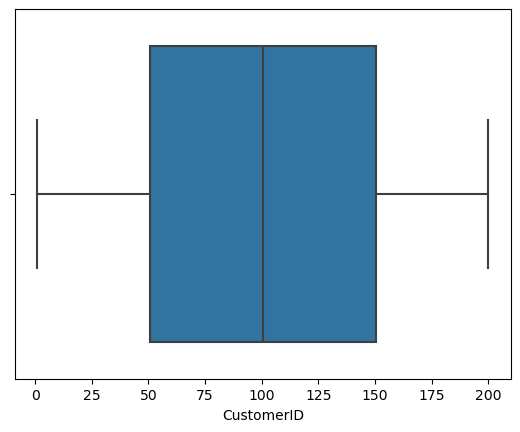

In [149]:
sns.boxplot(x= cust_df['CustomerID'])

In [150]:
cust_df['Genre'].value_counts().to_dict()

{'Female': 112, 'Male': 88}

In [151]:
cust_df['Genre'].replace({'Female': 0, 'Male': 1}, inplace = True)

In [152]:
cust_df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [153]:
cust_df['Spending_Score'].value_counts()

Spending_Score
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

# **Feature Selection**

### Linearity

In [154]:
cust_df.corr()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Genre,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual_Income,0.977548,0.056410,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

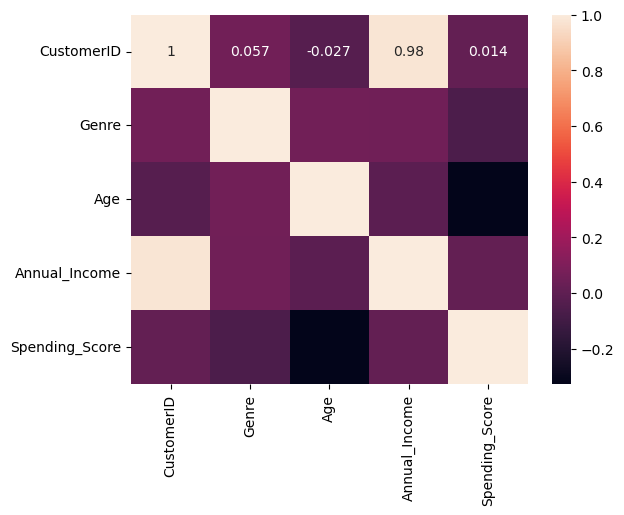

In [155]:
sns.heatmap(cust_df.corr(),annot= True)

<Axes: >

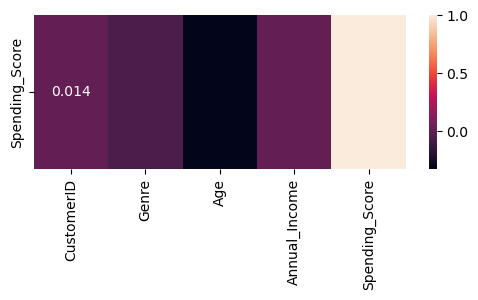

In [156]:
plt.figure(figsize= (6,2))
sns.heatmap(cust_df.corr().tail(1), annot= True)

### No Multi Colinearity

In [157]:
x = cust_df.drop('Spending_Score', axis= 1)
y = cust_df['Spending_Score']

In [158]:
vif_list = []

for i in range(x.shape[1]):
   vif = variance_inflation_factor(x.to_numpy(), i)
   print(f'VIF of {x.columns[i]} is :', vif)
   vif_list.append(vif)

VIF of CustomerID is : 67.28020784664572
VIF of Genre is : 1.7639074343135557
VIF of Age is : 5.814487361937163
VIF of Annual_Income is : 90.07242762967225


<Axes: >

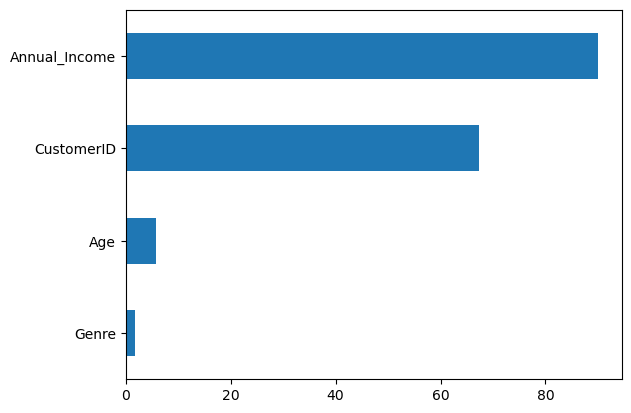

In [159]:
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = 'barh')

# **Model Training**

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 6)

In [161]:
x_train

,CustomerID,Genre,Age,Annual_Income
2,3,0,20,16
59,60,1,53,46
87,88,0,22,57
100,101,0,23,62
16,17,0,35,21
...,...,...,...,...
198,199,1,32,137
79,80,0,49,54
109,110,1,66,63
106,107,0,66,63


In [162]:
y_train

2       6
59     46
87     55
100    41
16     35
       ..
198    18
79     42
109    48
106    50
138    10
Name: Spending_Score, Length: 160, dtype: int64

In [163]:
x_test

,CustomerID,Genre,Age,Annual_Income
118,119,0,51,67
11,12,0,35,19
149,150,1,34,78
152,153,0,44,78
145,146,1,28,77
134,135,1,20,73
93,94,0,40,60
19,20,0,35,23
4,5,0,31,17
6,7,0,35,18


In [164]:
y_test

118    43
11     99
149    90
152    20
145    97
134     5
93     40
19     98
4      40
6       6
151    88
94     42
30      4
81     55
156     1
115    50
88     60
108    43
158     1
13     77
12     15
38     26
52     54
131    75
84     57
89     46
49     42
107    46
54     45
181    86
116    43
95     52
64     51
18     29
56     50
0      39
137    73
128    11
112    42
120    56
Name: Spending_Score, dtype: int64

# **Model Evaluation**

In [165]:
cust_lin = LinearRegression()
cust_lin

LinearRegression()

In [166]:
cust_lin.fit(x_train, y_train)

LinearRegression()

In [167]:
cust_lin.coef_

array([ 0.01070974, -1.78905706, -0.61054551, -0.04037501])

In [168]:
cust_lin.intercept_

76.74598223579315

### Evaluation on Training data

In [169]:
ytrain_pred = cust_lin.predict(x_train)
ytrain_pred

array([63.92120103, 41.38334673, 61.95506227, 61.28186829, 54.71107958,
       51.32815509, 48.85384383, 61.35411304, 38.87631173, 57.69330389,
       37.77694025, 32.65022806, 53.72749821, 62.97770168, 46.66668701,
       53.91212568, 44.87496249, 49.5791305 , 62.6918642 , 61.83187178,
       62.16331369, 47.380256  , 52.17788472, 53.67007916, 46.84306869,
       52.75720457, 44.11619612, 52.45274551, 57.46383652, 46.29400115,
       57.94993908, 63.80148244, 55.2776727 , 33.8213478 , 41.61905895,
       57.05400303, 56.76152971, 61.01091245, 44.22424549, 63.46958611,
       41.09007536, 47.19697901, 58.88830704, 62.06236315, 62.09091497,
       55.10616934, 45.73656486, 50.85558369, 47.17138763, 43.6614668 ,
       45.10706381, 45.12490589, 45.46862541, 44.2481289 , 62.57027619,
       45.87171754, 56.02020694, 56.99392401, 56.30509241, 51.31744536,
       52.146715  , 52.84373644, 59.03587743, 37.55771962, 56.97250453,
       31.01478272, 55.68222721, 58.13732348, 40.42683515, 53.25

In [170]:
mse_train = mean_squared_error(y_train, ytrain_pred)
print('MSE is :',mse_train)
print('*'*60)
print()

rmse_train = np.sqrt(mse_train)
print('RMSE is :',rmse_train)
print('*'*60)
print()

mae_train = mean_absolute_error(y_train, ytrain_pred)
print('MAE is :',mae_train)
print('*'*60)
print()

r_score_train = r2_score(y_train, ytrain_pred)
print('R2 Score is :',r_score_train)

MSE is : 566.9225729488355
************************************************************

RMSE is : 23.81013592881896
************************************************************

MAE is : 20.23359085314062
************************************************************

R2 Score is : 0.1189774277252611


### Evaluation on Testing data

In [171]:
ytest_pred = cust_lin.predict(x_test)
ytest_pred

array([44.1774941 , 54.73828092, 52.65558752, 48.37131865, 56.31639667,
       61.24445372, 50.9083764 , 54.66245878, 57.18624484, 54.72510724,
       49.62427942, 55.80345025, 37.4449459 , 50.45414358, 50.89891913,
       63.76357137, 54.59885082, 32.06356596, 52.75197515, 61.43532604,
       40.66606882, 53.69014814, 56.65056198, 49.69270975, 62.6546036 ,
       44.84083233, 56.73955779, 40.60049343, 45.07161668, 55.24132203,
       36.91027847, 58.90946704, 35.25069025, 42.48341823, 44.44211563,
       62.76164502, 53.95003675, 37.44967025, 52.17145239, 57.06294885])

In [172]:
mse_test = mean_squared_error(y_test, ytest_pred)
print('MSE is :',mse_test)
print('*'*60)
print()

rmse_test = np.sqrt(mse_test)
print('RMSE is :',rmse_test)
print('*'*60)
print()

mae_test = mean_absolute_error(y_test, ytest_pred)
print('MAE is :',mae_test)
print('*'*60)
print()

r_score_test = r2_score(y_test, ytest_pred)
print('R2 Score is :',r_score_test)

MSE is : 694.3102922674894
************************************************************

RMSE is : 26.34976835320359
************************************************************

MAE is : 20.827741180006605
************************************************************

R2 Score is : 0.05413035517438658


### Normality of Residuals

In [173]:
residuals_train = y_train - ytrain_pred
residuals_train

2     -57.921201
59      4.616653
87     -6.955062
100   -20.281868
16    -19.711080
         ...    
198   -34.019330
79     -3.505781
109    14.704633
106    14.947705
138   -51.857463
Name: Spending_Score, Length: 160, dtype: float64

<Axes: xlabel='Spending_Score', ylabel='Density'>

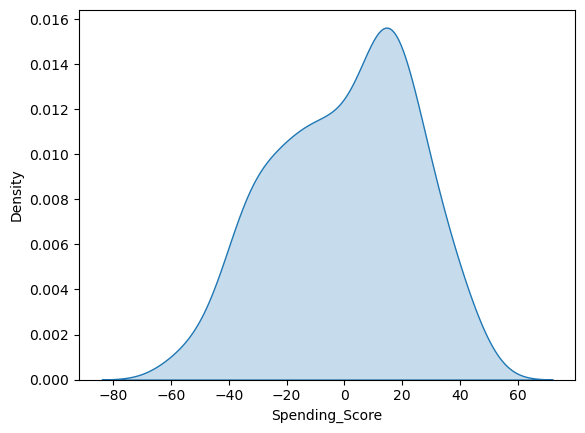

In [174]:
sns.kdeplot(residuals_train, fill= True)

In [175]:
skew(residuals_train)

-0.26946108714823686

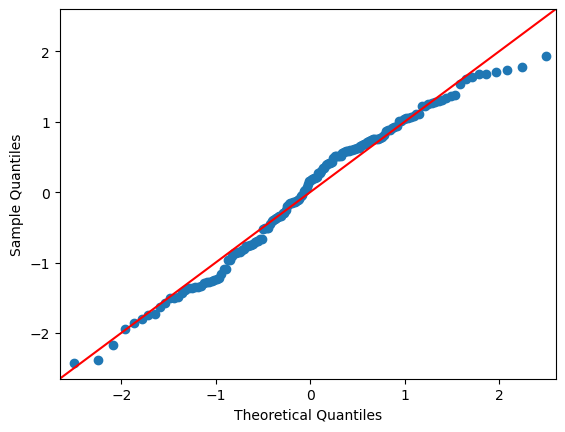

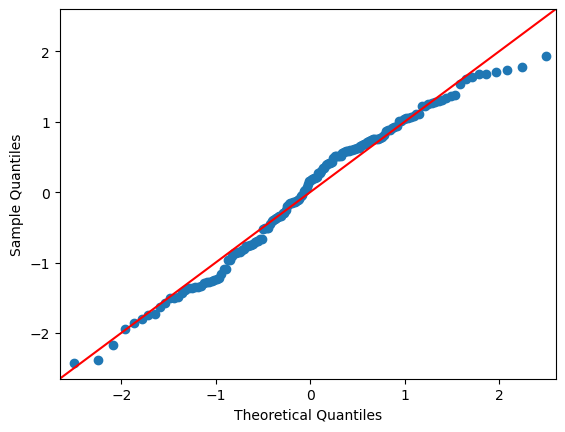

In [176]:
sm.qqplot(residuals_train, line= '45', fit= True)

# **Lasso Regression**

In [177]:
cust_lasso = Lasso()
cust_lasso

Lasso()

In [178]:
cust_lasso.fit(x_train, y_train)

Lasso()

In [179]:
cust_lasso.score(x_train, y_train)

0.11769895340226977

### Hyperparameter Tuning

In [180]:
cust_lasso = Lasso()

hyperparameters = {"alpha" :np.arange(0.01,5,0.01) }

gscv_cust_lasso = GridSearchCV(cust_lasso,hyperparameters,cv = 5)
gscv_cust_lasso.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [181]:
gscv_cust_lasso.best_estimator_

Lasso(alpha=4.99)

In [182]:
gscv_cust_lasso.best_params_

{'alpha': 4.99}

### Evaluation on Training data

In [183]:
cust_lasso = Lasso(alpha= 4.99)
cust_lasso.fit(x_train,y_train)

Lasso(alpha=4.99)

In [184]:
ytrain_lasso = cust_lasso.predict(x_train)
ytrain_lasso[:5]

array([62.54283348, 42.7444699 , 60.87424377, 60.20950247, 53.61202574])

In [185]:
y_train[:5]

2       6
59     46
87     55
100    41
16     35
Name: Spending_Score, dtype: int64

In [186]:
mse_lasso = mean_squared_error(y_train,ytrain_lasso)
print("Mean Squared Error :",mse_lasso)
print('*'*60)
print()

rmse_lasso = np.sqrt(mse_lasso)
print("Root Mean Squared Error :",rmse_lasso)
print('*'*60)
print()

mae_lasso = mean_absolute_error(y_train,ytrain_lasso)
print("Mean Absolute Error :",mae_lasso)
print('*'*60)
print()

r_squared_lasso = r2_score(y_train,ytrain_lasso)
print("R Squared Value : ",r_squared_lasso)

Mean Squared Error : 567.9193625992145
************************************************************

Root Mean Squared Error : 23.831058780490945
************************************************************

Mean Absolute Error : 20.229596272818952
************************************************************

R Squared Value :  0.11742837283893692


### Evaluation on Testing Data

In [187]:
ytest_lasso = cust_lasso.predict(x_test)
ytest_lasso

array([43.58540833, 53.64076363, 53.43762059, 47.5201501 , 57.00074756,
       61.78415314, 50.21934832, 53.59478301, 56.04108779, 53.66950152,
       50.47601156, 54.93378296, 38.78099024, 51.46836482, 51.62731922,
       62.4833799 , 53.78822287, 33.61249691, 53.38589239, 60.11951902,
       40.0644922 , 52.89555624, 55.76520402, 50.59096312, 61.48150928,
       44.34211088, 55.78244676, 41.87856336, 44.54327612, 54.43374364,
       36.51663017, 59.64821759, 36.81550424, 43.57014339, 43.94175819,
       63.14435142, 54.68663709, 38.80775033, 51.29018989, 57.7344598 ])

In [188]:
mse_lassot = mean_squared_error(y_test,ytest_lasso)
print("Mean Squared Error :",mse_lassot)
print('*'*60)
print()

rmse_lassot = np.sqrt(mse_lassot)
print("Root Mean Squared Error :",rmse_lassot)
print('*'*60)
print()

mae_lassot = mean_absolute_error(y_test,ytest_lasso)
print("Mean Absolute Error :",mae_lassot)
print('*'*60)
print()

r_squared_lassot = r2_score(y_test,ytest_lasso)
print("R Squared Value : ",r_squared_lassot)

Mean Squared Error : 694.0824233222736
************************************************************

Root Mean Squared Error : 26.34544407145709
************************************************************

Mean Absolute Error : 20.658190451057834
************************************************************

R Squared Value :  0.05444078456118728


# **Ridge Regression**

In [189]:
cust_ridge = Ridge()
cust_ridge

Ridge()

In [190]:
cust_ridge.fit(x_train, y_train)

Ridge()

In [191]:
cust_ridge.score(x_train, y_train)

0.11897667384916821

In [192]:
cust_ridge = Ridge()

hyperparameters = {"alpha" :np.arange(0.01,5,0.01) }

gscv_cust_ridge = GridSearchCV(cust_ridge,hyperparameters,cv = 5)
gscv_cust_ridge.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [193]:
gscv_cust_ridge.best_estimator_

Ridge(alpha=4.99)

### Evaluation on Training data

In [194]:
cust_ridge = Ridge(alpha= 4.99)
cust_ridge.fit(x_train,y_train)

Ridge(alpha=4.99)

In [195]:
ytrain_ridge = cust_ridge.predict(x_train)
ytrain_ridge[:10]

array([63.83855237, 41.49022499, 61.86984406, 61.19708153, 54.6253287 ,
       51.4482681 , 48.97175569, 61.47266736, 38.78068461, 57.81083801])

In [196]:
mse_ridge = mean_squared_error(y_train,ytrain_ridge)
print("Mean Squared Error :",mse_ridge)
print('*'*60)
print()

rmse_ridge = np.sqrt(mse_ridge)
print("Root Mean Squared Error :",rmse_ridge)
print('*'*60)
print()

mae_ridge = mean_absolute_error(y_train,ytrain_ridge)
print("Mean Absolute Error :",mae_ridge)
print('*'*60)
print()

r_squared_ridge = r2_score(y_train,ytrain_ridge)
print("R Squared Value : ",r_squared_ridge)

Mean Squared Error : 566.9325676868207
************************************************************

Root Mean Squared Error : 23.81034581199569
************************************************************

Mean Absolute Error : 20.234232383098323
************************************************************

R Squared Value :  0.11896189546355718


### Evaluation on Testing Data

In [197]:
ytest_ridge = cust_ridge.predict(x_test)
ytest_ridge[:10]

array([44.08743766, 54.65231866, 52.774762  , 48.28673007, 56.43659135,
       61.36608947, 50.81792177, 54.576194  , 57.10045916, 54.63813271])

In [198]:
mse_ridget = mean_squared_error(y_test,ytest_ridge)
print("Mean Squared Error :",mse_ridget)
print('*'*60)
print()

rmse_ridget = np.sqrt(mse_ridge)
print("Root Mean Squared Error :",rmse_ridget)
print('*'*60)
print()

mae_ridget = mean_absolute_error(y_test,ytest_ridge)
print("Mean Absolute Error :",mae_ridget)
print('*'*60)
print()

r_squared_ridget = r2_score(y_test,ytest_ridge)
print("R Squared Value : ",r_squared_ridget)

Mean Squared Error : 694.4097717272873
************************************************************

Root Mean Squared Error : 23.81034581199569
************************************************************

Mean Absolute Error : 20.81634682278257
************************************************************

R Squared Value :  0.05399483276840422


In [199]:
result = pd.DataFrame({"Linear Reg" : [566.92,23.81,0.1189],
                        "Lasso Reg"  : [567.91,23.83,0.1174],
                         "Ridge Reg"  : [566.93,23.81,0.1189]},index = ["MSE","RMSE","R2"])
result

,Linear Reg,Lasso Reg,Ridge Reg
MSE,566.9200,567.9100,566.9300
RMSE,23.8100,23.8300,23.8100
R2,0.1189,0.1174,0.1189


In [200]:
with open('cust_prj.pkl', 'wb') as f:
    pickle.dump(cust_lin, f)

In [201]:
list(x.columns)

['CustomerID', 'Genre', 'Age', 'Annual_Income']

In [202]:
data = {'Genre' : {'Female': 0, 'Male': 1}, 'columns' : list(x.columns)}
data

{'Genre': {'Female': 0, 'Male': 1},
 'columns': ['CustomerID', 'Genre', 'Age', 'Annual_Income']}

In [203]:
with open ('cust_proj.json', 'w') as f:
    json.dump(data, f)